# Video Type and Channel Analysis: Engagement Insights
This notebook provides a comprehensive analysis of YouTube video engagement by video type, topic, channel, and content features. It explores how different video topics, keywords, durations, publishing times, title lengths, hashtag usage, and channel performance impact engagement metrics such as likes, comments, and views. The workflow includes:

- Loading and merging video and engagement datasets
- Identifying top-performing videos and channels by topic and engagement score
- Analyzing the effect of keywords, content duration, publishing time, title length, and hashtags on engagement
- Summarizing best practices for maximizing engagement by topic and channel

The goal is to provide actionable insights for optimizing YouTube content strategy, improving audience engagement, and identifying high-performing channels.

### Install Required Python Packages
Install the `isodate` and `seaborn` packages, which are necessary for handling ISO 8601 durations and creating advanced data visualizations, respectively. This ensures all dependencies are available for the analysis.

In [ ]:
!pip install isodate
!pip install seaborn

## Import Required Libraries
Import the pandas library, which is essential for data manipulation and analysis throughout this notebook.

In [ ]:
import pandas as pd
import isodate
import seaborn as sns
import matplotlib.pyplot as plt
import re
import csv



## Load Engagement Data
Read the video engagement dataset from a CSV file. This dataset contains engagement metrics such as average KPI and video engagement scores for each video.

In [ ]:
data=pd.read_csv('dataset/video_with_engagement_score.csv')

## Preview Engagement Data
Display the first few rows of the engagement dataset to understand its structure and verify successful loading.

In [184]:
data.head()

,videoId,publishedAt,channelId,title,description,tags,defaultLanguage,defaultAudioLanguage,contentDuration,viewCount,...,is_english,translated,extracted_topicCategories,extracted_topicCategories_str,dominant_topic,topic_confidence,topic_label,average_kpi,comment_count,video_engagement_score
0,78245,2023-10-20 16:00:42+00:00,41338,Sydney Sweeney Perfecting the Shot,We're taking you behind the scenes on Sydney S...,NaN,NaN,en-US,PT18S,264368764.0,...,1,sydney sweeney perfecting shot,"['Entertainment', 'Physical_attractiveness']","Entertainment, Physical_attractiveness",4.0,0.440306,body,0.255842,1773,1.000000
1,59850,2024-11-08 21:00:36+00:00,45729,it’s FREAKY FRIDAY!! Her brows are made of GEMS…,NaN,NaN,en-US,en-US,PT47S,252195721.0,...,1,freaky friday brow made gem,"['Lifestyle_(sociology)', 'Physical_attractive...","Lifestyle_(sociology), Physical_attractiveness",4.0,0.440917,body,0.284013,2015,0.981042
2,32656,2023-06-22 21:10:28+00:00,6926,Which is your favortie? #hairstyle #shortvideo...,Brooke Monk Socials:\nFanfix: https://app.fanf...,NaN,NaN,NaN,PT58S,83582866.0,...,1,favortie hairstyle shortvideo short short,"['Lifestyle_(sociology)', 'Physical_attractive...","Lifestyle_(sociology), Physical_attractiveness",3.0,0.865761,hair,0.282932,33137,0.971054
3,14688,2024-01-08 13:23:58+00:00,26428,Korean Secret Glowing Skin Mask | Beauty Secre...,Korean Secret Glowing Skin Mask | Beauty Secre...,NaN,NaN,NaN,PT27S,405748145.0,...,1,korean secret glowing skin mask | beauty secre...,"['Lifestyle_(sociology)', 'Physical_attractive...","Lifestyle_(sociology), Physical_attractiveness",1.0,0.926275,makeup,0.249368,636,0.960695
4,61512,2021-05-15 11:34:21+00:00,48780,Pakistan cute girls makeup video| very good ma...,Pakistan cute girls makeup video| very good ma...,NaN,NaN,NaN,PT30S,64574323.0,...,1,pakistan cute girl makeup video| good makeup v...,"['Lifestyle_(sociology)', 'Physical_attractive...","Lifestyle_(sociology), Physical_attractiveness",3.0,0.557294,hair,0.289186,1781,0.960018


## Select Relevant Engagement Columns
Extract only the relevant columns (videoId, average_kpi, video_engagement_score) from the engagement dataset for further analysis.

In [189]:
engage_video=data[['videoId','average_kpi','video_engagement_score']]
engage_video.head()

,videoId,average_kpi,video_engagement_score
0,78245,0.255842,1.000000
1,59850,0.284013,0.981042
2,32656,0.282932,0.971054
3,14688,0.249368,0.960695
4,61512,0.289186,0.960018


## Load Video Metadata with Topics
Read the video metadata file, which includes information about each video such as its topic, language, duration, and topic confidence. This data will be merged with engagement metrics for deeper analysis.

In [190]:
video=pd.read_csv('videos_with_topics_5.csv')
video.head()

,videoId,publishedAt,channelId,title,description,tags,defaultLanguage,defaultAudioLanguage,contentDuration,viewCount,...,commentCount,topicCategories,cleanedText,is_english,translated,extracted_topicCategories,extracted_topicCategories_str,dominant_topic,topic_confidence,topic_label
0,85806,2024-01-15 00:59:29+00:00,33807,Unlocking the Benefits of Face Masks for Skin ...,NaN,NaN,en-US,en-US,PT9S,72.0,...,0.0,"['https://en.wikipedia.org/wiki/Health', 'http...",unlocking benefit face mask skin health,1,unlocking benefit face mask skin health,"['Health', 'Lifestyle_(sociology)']","Health, Lifestyle_(sociology)",1.0,0.884578,makeup
1,30556,2023-10-27 19:32:16+00:00,46650,Get ready for the Magic💚💜🤍💝✨ #hydration #glowi...,NaN,NaN,NaN,NaN,PT45S,257.0,...,0.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,get ready magic hydration glowingskin nomakeup...,1,get ready magic hydration glowingskin nomakeup...,"['Lifestyle_(sociology)', 'Physical_attractive...","Lifestyle_(sociology), Physical_attractiveness",1.0,0.513370,makeup
2,51771,2024-09-28 01:23:22+00:00,14346,#trending #makeup #beautymakeup #yslbeauty #lu...,NaN,NaN,NaN,en-US,PT19S,164.0,...,2.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,trending makeup beautymakeup yslbeauty luxury ...,1,trending makeup beautymakeup yslbeauty luxury ...,"['Lifestyle_(sociology)', 'Physical_attractive...","Lifestyle_(sociology), Physical_attractiveness",1.0,0.418025,makeup
3,45298,2023-07-13 15:19:28+00:00,50139,#shortvedio #balayage,NaN,NaN,NaN,NaN,PT14S,1207.0,...,0.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,shortvedio balayage,0,shortvedio balayage,"['Lifestyle_(sociology)', 'Physical_attractive...","Lifestyle_(sociology), Physical_attractiveness",3.0,0.400961,hair
4,43611,2023-04-29 18:47:37+00:00,8143,Full Face of Merit Beauty 🤎 featuring new Flus...,NaN,NaN,NaN,en,PT56S,8647.0,...,7.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,full face merit beauty featuring new flush bal...,1,full face merit beauty featuring new flush bal...,"['Lifestyle_(sociology)', 'Physical_attractive...","Lifestyle_(sociology), Physical_attractiveness",1.0,0.773569,makeup


## Inspect Video Metadata
Display information about the video metadata DataFrame, including column types and non-null counts, to understand the structure and completeness of the data.

In [6]:
video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91113 entries, 0 to 91112
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   videoId                        91113 non-null  int64  
 1   publishedAt                    91113 non-null  object 
 2   channelId                      91113 non-null  int64  
 3   title                          91113 non-null  object 
 4   description                    35105 non-null  object 
 5   tags                           20796 non-null  object 
 6   defaultLanguage                15570 non-null  object 
 7   defaultAudioLanguage           29690 non-null  object 
 8   contentDuration                91113 non-null  object 
 9   viewCount                      91111 non-null  float64
 10  likeCount                      86254 non-null  float64
 11  commentCount                   89917 non-null  float64
 12  topicCategories                90849 non-null 

## Select Relevant Video Columns
Extract key columns from the video metadata, such as videoId, published date, channel, title, language, duration, and topic information, for merging with engagement data.

In [191]:
video2=video[['videoId','publishedAt','channelId','title','defaultLanguage','defaultAudioLanguage','contentDuration','dominant_topic','topic_confidence','topic_label']]
video2.head()

,videoId,publishedAt,channelId,title,defaultLanguage,defaultAudioLanguage,contentDuration,dominant_topic,topic_confidence,topic_label
0,85806,2024-01-15 00:59:29+00:00,33807,Unlocking the Benefits of Face Masks for Skin ...,en-US,en-US,PT9S,1.0,0.884578,makeup
1,30556,2023-10-27 19:32:16+00:00,46650,Get ready for the Magic💚💜🤍💝✨ #hydration #glowi...,NaN,NaN,PT45S,1.0,0.513370,makeup
2,51771,2024-09-28 01:23:22+00:00,14346,#trending #makeup #beautymakeup #yslbeauty #lu...,NaN,en-US,PT19S,1.0,0.418025,makeup
3,45298,2023-07-13 15:19:28+00:00,50139,#shortvedio #balayage,NaN,NaN,PT14S,3.0,0.400961,hair
4,43611,2023-04-29 18:47:37+00:00,8143,Full Face of Merit Beauty 🤎 featuring new Flus...,NaN,en,PT56S,1.0,0.773569,makeup


## Merge Video and Engagement Data
Combine the selected video metadata with engagement metrics using the videoId as the key. This merged DataFrame will be used for all subsequent analyses.

In [192]:
engage=video2.merge(engage_video, left_on='videoId', right_on='videoId', how='inner')
engage.shape

(24138, 12)

## Preview Merged Data
Display the first few rows of the merged DataFrame to verify the join and inspect the combined video and engagement information.

In [193]:
engage.head()

,videoId,publishedAt,channelId,title,defaultLanguage,defaultAudioLanguage,contentDuration,dominant_topic,topic_confidence,topic_label,average_kpi,video_engagement_score
0,51771,2024-09-28 01:23:22+00:00,14346,#trending #makeup #beautymakeup #yslbeauty #lu...,NaN,en-US,PT19S,1.0,0.418025,makeup,0.444000,0.131643
1,43611,2023-04-29 18:47:37+00:00,8143,Full Face of Merit Beauty 🤎 featuring new Flus...,NaN,en,PT56S,1.0,0.773569,makeup,0.201946,0.361636
2,43693,2025-06-19 01:45:26+00:00,47519,glowup tips ✨️ #jenny #kpop #skincare #skincar...,en,en,PT11S,1.0,0.919804,makeup,0.344598,0.331011
3,46258,2023-12-16 04:56:30+00:00,33568,The Science of Sheet Masks: Instantly Revitali...,en-US,en-US,PT9S,2.0,0.599723,perfume,0.413313,0.211150
4,46877,2025-01-11 10:03:58+00:00,26524,Makeup #makeup #makeupartist #mua #highlights ...,NaN,NaN,PT10S,1.0,0.703466,makeup,0.324417,0.242348


## Sort Videos by Engagement Score
Sort the merged DataFrame in descending order of video engagement score to identify the most engaging videos.

In [194]:
engage = engage.sort_values(by='video_engagement_score', ascending=False)


## Explore Unique Video Topics
List all unique topic labels present in the merged DataFrame to understand the range of video categories available for analysis.

In [195]:
engage['topic_label'].unique()

array(['body', 'hair', 'makeup', 'perfume', 'skin', nan], dtype=object)

## Preview Top Videos in 'Hair' Category
Display the top 9 videos in the 'hair' topic category, sorted by engagement score, to identify high-performing content in this segment.

In [196]:
engage[engage['topic_label']=='hair'].head(9)

,videoId,publishedAt,channelId,title,defaultLanguage,defaultAudioLanguage,contentDuration,dominant_topic,topic_confidence,topic_label,average_kpi,video_engagement_score
309,32656,2023-06-22 21:10:28+00:00,6926,Which is your favortie? #hairstyle #shortvideo...,NaN,NaN,PT58S,3.0,0.865761,hair,0.282932,0.971054
13940,61512,2021-05-15 11:34:21+00:00,48780,Pakistan cute girls makeup video| very good ma...,NaN,NaN,PT30S,3.0,0.557294,hair,0.289186,0.960018
12657,24907,2024-04-23 21:11:54+00:00,33870,Moments like THIS are my WHY! 😭💗 #alopecia #al...,NaN,NaN,PT41S,3.0,0.542672,hair,0.284027,0.944222
8366,42056,2023-08-04 17:47:57+00:00,25356,Hair is fresh again 💚,NaN,NaN,PT25S,3.0,0.729267,hair,0.301403,0.939299
1427,2947,2024-06-24 17:45:00+00:00,39022,POV: you grew up with curly hair. I relate to ...,NaN,NaN,PT59S,3.0,0.689415,hair,0.325750,0.933236
5231,78060,2022-07-19 15:35:34+00:00,46757,wendyskin’s hair dying history (pt. 1),NaN,en,PT56S,3.0,0.699608,hair,0.317011,0.932970
23145,85744,2021-12-22 17:54:17+00:00,27748,Hair Transformation 🔥😱,NaN,NaN,PT46S,3.0,0.733333,hair,0.303590,0.928783
15089,68637,2022-04-09 17:00:14+00:00,21411,YOU WONT BELIEVE THIS,NaN,en,PT28S,3.0,0.598349,hair,0.283755,0.926550
12706,53793,2023-10-09 17:17:21+00:00,50201,Bun drop challenge 😍 #haare #haircare #hairgoa...,NaN,ru,PT54S,3.0,0.697603,hair,0.304030,0.926543


## Preview Top Videos in 'Perfume' Category
Display the top 10 videos in the 'perfume' topic category, sorted by engagement score, to identify high-performing content in this segment.

In [197]:
engage[engage['topic_label']=='perfume'].head(10)

,videoId,publishedAt,channelId,title,defaultLanguage,defaultAudioLanguage,contentDuration,dominant_topic,topic_confidence,topic_label,average_kpi,video_engagement_score
1100,32958,2023-10-11 11:00:15+00:00,29048,WHAT JUST HAPPENED?! 😳,NaN,en,PT52S,2.0,0.599999,perfume,0.252080,0.951557
15249,55433,2023-05-01 23:55:08+00:00,24136,This is how I face my tapes #transformation #f...,NaN,NaN,PT16S,2.0,0.456632,perfume,0.284032,0.933703
15103,59625,2024-09-05 03:32:19+00:00,45729,We just used the SAME makeup wipe on our BALD ...,en-US,en-US,PT39S,2.0,0.366728,perfume,0.302798,0.929835
6936,30765,2023-04-26 22:00:08+00:00,10438,I wish I had a different name until... THIS HA...,NaN,NaN,PT38S,2.0,0.550081,perfume,0.299304,0.918630
1870,49637,2024-03-22 08:21:38+00:00,45729,Who is the real BALD one?,en-US,en-US,PT9S,2.0,0.730807,perfume,0.263462,0.914967
9591,74615,2022-02-19 23:14:03+00:00,14489,Who is your favorite Disney princess? 👸🏻 디즈니 공...,NaN,ko,PT34S,2.0,0.555911,perfume,0.297658,0.908620
5255,20967,2023-06-27 11:29:17+00:00,30924,Falak Naaz most Awaited Viral Video!Long Hair!...,NaN,NaN,PT1M1S,2.0,0.523400,perfume,0.292995,0.907862
22823,10237,2024-02-25 06:31:33+00:00,6653,Bride by Nirali’s ✨ for more videos go ...,en-IN,zxx,PT1M1S,2.0,0.468519,perfume,0.278243,0.901970
21802,1205,2023-05-04 17:31:20+00:00,35033,Oh ohhh honey got me hooked on you 🐝❤️ #honeyf...,NaN,en,PT26S,2.0,0.577928,perfume,0.316894,0.889059
9553,16285,2023-11-23 15:14:21+00:00,1738,Dead girl gets a 2nd chance ☠️ #prettylittleli...,NaN,NaN,PT33S,2.0,0.442940,perfume,0.279503,0.886846


## Preview Top Videos in 'Makeup' Category
Display the top 10 videos in the 'makeup' topic category, sorted by engagement score, to identify high-performing content in this segment.

In [198]:
engage[engage['topic_label']=='makeup'].head(10)

,videoId,publishedAt,channelId,title,defaultLanguage,defaultAudioLanguage,contentDuration,dominant_topic,topic_confidence,topic_label,average_kpi,video_engagement_score
11152,14688,2024-01-08 13:23:58+00:00,26428,Korean Secret Glowing Skin Mask | Beauty Secre...,NaN,NaN,PT27S,1.0,0.926275,makeup,0.249368,0.960695
13001,21710,2021-10-06 11:19:43+00:00,53183,Every girls can be gorgeous after make up,NaN,NaN,PT50S,1.0,0.796592,makeup,0.308141,0.954028
15382,4110,2024-03-26 22:15:09+00:00,45729,I think I used to much of the bronzing drops…,en-US,en-US,PT29S,1.0,0.608521,makeup,0.272179,0.949484
16231,69445,2023-07-25 17:25:32+00:00,14429,what men think no makeup is #makeup,NaN,NaN,PT35S,1.0,0.838898,makeup,0.376624,0.945674
20915,47096,2023-07-03 08:52:22+00:00,33476,Rate this transition ⭐️#shorts #youtubeshorts ...,NaN,en-IN,PT30S,1.0,0.603154,makeup,0.274740,0.939901
5790,54071,2023-01-02 17:48:47+00:00,36854,Relatable ? 🤣🤣🤣 #shorts #relatable #bride #makeup,NaN,en,PT38S,1.0,0.866532,makeup,0.276611,0.935763
7068,26564,2023-06-23 21:29:08+00:00,6926,Which is your favorite? #shortvideo #shorts #m...,NaN,NaN,PT58S,1.0,0.837144,makeup,0.274542,0.934782
12709,82728,2024-12-07 15:26:19+00:00,20111,I’m not brown🟤 🙎🏽‍♀️ #relatable #trend #shorts...,NaN,NaN,PT17S,1.0,0.693211,makeup,0.288872,0.929108
17300,87197,2022-02-22 03:28:29+00:00,47940,#shorts Easy self bridal makeup tutorial 💄✨ #m...,NaN,NaN,PT1M,1.0,0.919622,makeup,0.312007,0.922801
9160,40982,2022-07-24 13:30:20+00:00,19657,No-makeup SCHOOL Look in 5mns CHALLENGE!!! 😱😍 ...,NaN,hi,PT1M,1.0,0.899837,makeup,0.253377,0.918516


## Preview Top Videos in 'Skin' Category
Display the top 10 videos in the 'skin' topic category, sorted by engagement score, to identify high-performing content in this segment.

In [199]:
engage[engage['topic_label']=='skin'].head(10)

,videoId,publishedAt,channelId,title,defaultLanguage,defaultAudioLanguage,contentDuration,dominant_topic,topic_confidence,topic_label,average_kpi,video_engagement_score
22600,66607,2023-03-31 11:00:37+00:00,29048,THIS MADE ME FEEL BLUE 🥲,NaN,en,PT1M,0.0,0.724762,skin,0.297605,0.950144
7218,63331,2022-06-29 17:00:33+00:00,8177,Can you keep a secret? 🤫,NaN,en,PT22S,0.0,0.598937,skin,0.275622,0.930939
7824,40498,2023-03-10 13:23:33+00:00,26891,I know it’s late but.. Happy International Wom...,NaN,id,PT1M,0.0,0.394483,skin,0.304196,0.930485
18041,28691,2022-12-30 22:17:50+00:00,10895,me and my fat behavior 💁‍♀️ #fat #doublechinco...,NaN,NaN,PT15S,0.0,0.669116,skin,0.271991,0.915058
14798,24570,2022-01-23 08:56:16+00:00,30413,Meet the booties 😍😍😍 #beauty #shorts #ytshorts...,NaN,NaN,PT10S,0.0,0.347569,skin,0.298264,0.912307
23811,52761,2022-11-14 19:03:02+00:00,11359,If I hear this one more time😡😡😂 #naturalhair #...,NaN,NaN,PT45S,0.0,0.337741,skin,0.358040,0.909992
13295,46768,2024-04-06 15:23:44+00:00,10895,ate and left no crumbs 💅 #doublechincontour #c...,NaN,NaN,PT1M,0.0,0.693309,skin,0.283556,0.903244
23468,38879,2023-02-22 14:29:33+00:00,52079,does it really work?😳 id @elpltt,NaN,NaN,PT11S,0.0,0.550334,skin,0.260261,0.893624
6739,58101,2022-11-21 20:04:17+00:00,29048,THIS IS WHAT I DO WHEN I&#39;M BORED 🤪,NaN,en,PT41S,0.0,0.733325,skin,0.279119,0.892923
16861,52129,2023-02-25 18:00:15+00:00,1100,"SHEESH, BYE OIL 👋🏾 You already know our #INVIS...",NaN,en-US,PT12S,0.0,0.583132,skin,0.268324,0.876452


## Preview Top Videos in 'Body' Category
Display the top 10 videos in the 'body' topic category, sorted by engagement score, to identify high-performing content in this segment.

In [200]:
engage[engage['topic_label']=='body'].head(10)

,videoId,publishedAt,channelId,title,defaultLanguage,defaultAudioLanguage,contentDuration,dominant_topic,topic_confidence,topic_label,average_kpi,video_engagement_score
14062,78245,2023-10-20 16:00:42+00:00,41338,Sydney Sweeney Perfecting the Shot,NaN,en-US,PT18S,4.0,0.440306,body,0.255842,1.000000
6692,59850,2024-11-08 21:00:36+00:00,45729,it’s FREAKY FRIDAY!! Her brows are made of GEMS…,en-US,en-US,PT47S,4.0,0.440917,body,0.284013,0.981042
18956,88850,2022-08-03 10:53:16+00:00,29048,WHY IS EVERYONE OBSESSED WITH THIS LOOK? 😬,NaN,en,PT58S,4.0,0.399999,body,0.314353,0.937167
10700,53550,2024-11-15 19:34:29+00:00,45729,IT’S FREAK FRIDAY! THAT WAS CRAZY,en-US,en-US,PT53S,4.0,0.549880,body,0.274494,0.933341
11181,10902,2023-01-05 00:00:01+00:00,29048,THIS IS VERY CONFUSING 😨,NaN,en,PT50S,4.0,0.599954,body,0.272163,0.929261
7507,45,2023-03-14 06:30:00+00:00,4392,Nainowaale ne #browngirl #ytshorts,NaN,en-IN,PT18S,4.0,0.439496,body,0.307228,0.926516
11137,14019,2022-07-02 11:30:01+00:00,29048,WHY IS EVERYONE OBSESSED WITH THIS LOOK? 😬,NaN,en,PT59S,4.0,0.399999,body,0.316664,0.925527
11033,18248,2023-05-27 22:33:31+00:00,14492,Handsome where ?? 😂 trans women are women 🏳️‍⚧...,NaN,NaN,PT30S,4.0,0.603696,body,0.299814,0.914540
15292,76102,2024-02-20 15:30:25+00:00,26578,Dreamum Wakepum Makeup Part 2 😘 #youtubeshorts,NaN,en,PT41S,4.0,0.439901,body,0.276207,0.899934
12333,56323,2023-11-28 12:36:46+00:00,1107,My tan routine 🫶🏽☺️,NaN,NaN,PT29S,4.0,0.400001,body,0.286178,0.887242


## Filter High Engagement Videos
Extract videos with a high engagement score (greater than 0.70) for focused analysis on top-performing content.

In [208]:
# Extract titles where average_KPI is more than 50
high_engage = engage[engage['video_engagement_score'] > 0.70]
high_engage.head(10)

,videoId,publishedAt,channelId,title,defaultLanguage,defaultAudioLanguage,contentDuration,dominant_topic,topic_confidence,topic_label,average_kpi,video_engagement_score
14062,78245,2023-10-20 16:00:42+00:00,41338,Sydney Sweeney Perfecting the Shot,NaN,en-US,PT18S,4.0,0.440306,body,0.255842,1.000000
6692,59850,2024-11-08 21:00:36+00:00,45729,it’s FREAKY FRIDAY!! Her brows are made of GEMS…,en-US,en-US,PT47S,4.0,0.440917,body,0.284013,0.981042
309,32656,2023-06-22 21:10:28+00:00,6926,Which is your favortie? #hairstyle #shortvideo...,NaN,NaN,PT58S,3.0,0.865761,hair,0.282932,0.971054
11152,14688,2024-01-08 13:23:58+00:00,26428,Korean Secret Glowing Skin Mask | Beauty Secre...,NaN,NaN,PT27S,1.0,0.926275,makeup,0.249368,0.960695
13940,61512,2021-05-15 11:34:21+00:00,48780,Pakistan cute girls makeup video| very good ma...,NaN,NaN,PT30S,3.0,0.557294,hair,0.289186,0.960018
13001,21710,2021-10-06 11:19:43+00:00,53183,Every girls can be gorgeous after make up,NaN,NaN,PT50S,1.0,0.796592,makeup,0.308141,0.954028
1100,32958,2023-10-11 11:00:15+00:00,29048,WHAT JUST HAPPENED?! 😳,NaN,en,PT52S,2.0,0.599999,perfume,0.252080,0.951557
22600,66607,2023-03-31 11:00:37+00:00,29048,THIS MADE ME FEEL BLUE 🥲,NaN,en,PT1M,0.0,0.724762,skin,0.297605,0.950144
15382,4110,2024-03-26 22:15:09+00:00,45729,I think I used to much of the bronzing drops…,en-US,en-US,PT29S,1.0,0.608521,makeup,0.272179,0.949484
16231,69445,2023-07-25 17:25:32+00:00,14429,what men think no makeup is #makeup,NaN,NaN,PT35S,1.0,0.838898,makeup,0.376624,0.945674


## Split High Engagement Videos by Topic
Divide the high engagement videos into separate DataFrames for each topic (skin, hair, body, perfume, makeup) to enable topic-specific analysis.

In [209]:
skin=high_engage[high_engage['topic_label'] == 'skin']
hair=high_engage[high_engage['topic_label'] == 'hair']
body=high_engage[high_engage['topic_label'] == 'body']
perfume=high_engage[high_engage['topic_label'] == 'perfume']
makeup=high_engage[high_engage['topic_label'] == 'makeup']

IMPORTANT LIFT MORE THAN 1 MEANS BETTER PERFOMANCE

## Analyze Impact of Video Type Keywords
Define a comprehensive list of video type keywords (e.g., 'routine', 'review', 'tutorial') and analyze their presence in video titles. Calculate the average engagement score for videos with and without each keyword, and compute the 'lift' to identify keywords associated with higher engagement.

In [ ]:
video_type_keywords = [
    'routine', 'review', 'tutorial', 'how to', 'guide', 'tips',
    'dupe', 'compare', 'battle', 'before after', 'transformation',
    'results', 'journey', 'top', 'trending', 'must have',
    'hack', 'secret', 'trick', 'grwm', 'day in the life', 'get ready with me',
    'challenge', 'experiment', 'vlog', 'unboxing', 'haul', 'favorites',
    'product empties', 'first impressions', 'q&a', 'storytime',
    'behind the scenes', 'asmr', 'reaction', 'collab', 'parody',
    'review vs reality', 'expectation vs reality', 'update',
    'mini series', 'explained', 'beginner friendly', 'advanced',
    'ultimate', 'step by step',
    'morning routine', 'night routine', 'makeup routine',
    'life hack', 'pro tips', 'diy', 'before you buy', 'must try',
    'rating', 'testing', 'does it work', 'worth it',
    'demo', 'walkthrough', 'behind the scenes', 'journey to',
    'challenges', 'experiment gone wrong', 'epic fail',
    'speedrun', 'compilation', 'reaction video', 'funny moments',
    'tier list', 'ranking', 'countdown', 'top 10', 'best of',
    'beginner tips', 'for beginners', 'for experts', 'ultimate guide',
    'case study', 'deep dive', 'explained simply', 'my experience',
    'success story', 'fail story', 'review haul', 'open box',
    'shopping haul', 'wishlist', 'must avoid', 'what i eat in a day',
    'day in my life', 'week in my life'
]
for kw in video_type_keywords:
    high_engage[kw] = high_engage['title'].str.lower().apply(lambda x: int(kw in str(x)))

results = {}
for kw in video_type_keywords:
    results[kw] = high_engage.groupby(kw)['video_engagement_score'].mean().to_dict()

engagement_df = pd.DataFrame(results).T
engagement_df.columns = ['no_keyword', 'with_keyword']
engagement_df['lift'] = engagement_df['with_keyword'] / engagement_df['no_keyword']
engagement_df.sort_values('lift', ascending=False, inplace=True)
print(engagement_df)

                   no_keyword  with_keyword      lift
journey              0.780977      0.794694  1.017564
review               0.781038      0.791231  1.013051
transformation       0.780662      0.785332  1.005982
secret               0.780968      0.784476  1.004492
results              0.781056      0.781507  1.000577
get ready with me    0.781062      0.780614  0.999426
trick                0.781061      0.780496  0.999277
tutorial             0.781600      0.775719  0.992475
trending             0.781378      0.773900  0.990429
grwm                 0.781752      0.770050  0.985031
dupe                 0.781068      0.766861  0.981811
top                  0.781273      0.766434  0.981007
tips                 0.781701      0.766686  0.980792
routine              0.781694      0.763812  0.977124
hack                 0.781621      0.763445  0.976746
how to               0.782017      0.753462  0.963486
guide                0.781424      0.748723  0.958152
must have            0.78109

C:\Users\user\AppData\Local\Temp\ipykernel_7724\2444620505.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_engage[kw] = high_engage['title'].str.lower().apply(lambda x: int(kw in str(x)))
C:\Users\user\AppData\Local\Temp\ipykernel_7724\2444620505.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_engage[kw] = high_engage['title'].str.lower().apply(lambda x: int(kw in str(x)))
C:\Users\user\AppData\Local\Temp\ipykernel_7724\2444620505.py:8: SettingWithCopyWarning: 
A value is trying to be set 

## Analyze Keyword Lift for 'Skin' Topic
For the 'skin' topic, calculate the engagement lift for each keyword. This helps identify which keywords in video titles are most effective at boosting engagement for skin-related content.

In [ ]:
for kw in video_type_keywords:
    skin[kw] = skin['title'].str.lower().apply(lambda x: int(kw in str(x)))

results = {}
for kw in video_type_keywords:
    results[kw] = skin.groupby(kw)['video_engagement_score'].mean().to_dict()

engagement_skin = pd.DataFrame(results).T
engagement_skin.columns = ['no_keyword', 'with_keyword']
engagement_skin['lift'] = engagement_skin['with_keyword'] / engagement_skin['no_keyword']
engagement_skin.sort_values('lift', ascending=False, inplace=True)

print(engagement_skin[engagement_skin['lift'] > 1])

           no_keyword  with_keyword      lift
trick        0.779689      0.876452  1.124104
results      0.779766      0.866009  1.110602
challenge    0.780110      0.819166  1.050065
tips         0.779721      0.802808  1.029610
top          0.780167      0.790588  1.013357
haul         0.780358      0.785457  1.006535
rating       0.780364      0.784624  1.005459
secret       0.780036      0.783312  1.004199


C:\Users\user\AppData\Local\Temp\ipykernel_7724\2711393306.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skin[kw] = skin['title'].str.lower().apply(lambda x: int(kw in str(x)))


## Analyze Keyword Lift for 'Hair' Topic
For the 'hair' topic, calculate the engagement lift for each keyword. This analysis reveals which keywords are most effective for increasing engagement in hair-related videos.

In [227]:


for kw in video_type_keywords:
    hair[kw] = hair['title'].str.lower().apply(lambda x: int(kw in str(x)))

results = {}
for kw in video_type_keywords:
    results[kw] = hair.groupby(kw)['video_engagement_score'].mean().to_dict()

engagement_hair = pd.DataFrame(results).T
engagement_hair.columns = ['no_keyword', 'with_keyword']
engagement_hair['lift'] = engagement_hair['with_keyword'] / engagement_hair['no_keyword']
engagement_hair.sort_values('lift', ascending=False, inplace=True)
print(engagement_hair[engagement_hair['lift'] > 1])

                   no_keyword  with_keyword      lift
challenge            0.782008      0.844413  1.079801
journey              0.781721      0.820914  1.050137
results              0.782027      0.821208  1.050102
get ready with me    0.782293      0.797377  1.019282
worth it             0.782298      0.795400  1.016748
trending             0.782059      0.787584  1.007064
storytime            0.782320      0.786917  1.005876
transformation       0.781860      0.784615  1.003524


C:\Users\user\AppData\Local\Temp\ipykernel_7724\242918498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hair[kw] = hair['title'].str.lower().apply(lambda x: int(kw in str(x)))


## Analyze Keyword Lift for 'Body' Topic
For the 'body' topic, calculate the engagement lift for each keyword. This analysis highlights which keywords are most effective for body-related content.

In [228]:

for kw in video_type_keywords:
    body[kw] = body['title'].str.lower().apply(lambda x: int(kw in str(x)))

results = {}
for kw in video_type_keywords:
    results[kw] = body.groupby(kw)['video_engagement_score'].mean().to_dict()

engagement_body = pd.DataFrame(results).T
engagement_body.columns = ['no_keyword', 'with_keyword']
engagement_body['lift'] = engagement_body['with_keyword'] / engagement_body['no_keyword']
engagement_body.sort_values('lift', ascending=False, inplace=True)
print(engagement_body[engagement_body['lift'] > 1])

          no_keyword  with_keyword      lift
ultimate    0.787761      0.845786  1.073658
routine     0.787402      0.833859  1.059001


C:\Users\user\AppData\Local\Temp\ipykernel_7724\3351728820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body[kw] = body['title'].str.lower().apply(lambda x: int(kw in str(x)))


## Analyze Keyword Lift for 'Perfume' Topic
For the 'perfume' topic, calculate the engagement lift for each keyword. This analysis identifies which keywords are most effective for perfume-related content.

In [ ]:
for kw in video_type_keywords:
    perfume[kw] = perfume['title'].str.lower().apply(lambda x: int(kw in str(x)))

results = {}
for kw in video_type_keywords:
    results[kw] = perfume.groupby(kw)['video_engagement_score'].mean().to_dict()

engagement_perfume = pd.DataFrame(results).T
engagement_perfume.columns = ['no_keyword', 'with_keyword']
engagement_perfume['lift'] = engagement_perfume['with_keyword'] / engagement_perfume['no_keyword']
engagement_perfume.sort_values('lift', ascending=False, inplace=True)
print(engagement_perfume[engagement_perfume['lift'] > 1])

                no_keyword  with_keyword      lift
hack              0.783569      0.889059  1.134628
secret            0.782750      0.849007  1.084645
tips              0.783058      0.837613  1.069669
transformation    0.781215      0.827939  1.059809
demo              0.783862      0.819906  1.045984


C:\Users\user\AppData\Local\Temp\ipykernel_7724\3679812034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perfume[kw] = perfume['title'].str.lower().apply(lambda x: int(kw in str(x)))


## Analyze Keyword Lift for 'Makeup' Topic
For the 'makeup' topic, calculate the engagement lift for each keyword. This analysis reveals which keywords are most effective for makeup-related content.

In [230]:
for kw in video_type_keywords:
    makeup[kw] = makeup['title'].str.lower().apply(lambda x: int(kw in str(x)))

results = {}
for kw in video_type_keywords:
    results[kw] = makeup.groupby(kw)['video_engagement_score'].mean().to_dict()

engagement_makeup = pd.DataFrame(results).T
engagement_makeup.columns = ['no_keyword', 'with_keyword']
engagement_makeup['lift'] = engagement_makeup['with_keyword'] / engagement_makeup['no_keyword']
engagement_makeup.sort_values('lift', ascending=False, inplace=True)
print(engagement_makeup[engagement_makeup['lift'] > 1])

                   no_keyword  with_keyword      lift
morning routine      0.779028      0.824220  1.058010
must try             0.779003      0.811641  1.041897
compilation          0.779029      0.801449  1.028780
vlog                 0.779002      0.800964  1.028193
review               0.779039      0.791231  1.015650
get ready with me    0.778968      0.790508  1.014815
transformation       0.778692      0.786819  1.010436
challenge            0.778633      0.786710  1.010374
tutorial             0.779005      0.779569  1.000724
secret               0.779077      0.779430  1.000453


C:\Users\user\AppData\Local\Temp\ipykernel_7724\1548541813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  makeup[kw] = makeup['title'].str.lower().apply(lambda x: int(kw in str(x)))


## Summarize Top Keywords by Topic
Print the keywords with a lift greater than 1 for each topic, highlighting which keywords are most strongly associated with higher engagement in each content category.

In [231]:
print('Makeup topic - keywords with lift > 1:')
print(engagement_makeup[engagement_makeup['lift'] > 1].index)

print('body topic - keywords with lift > 1:')
print(engagement_body[engagement_body['lift'] > 1].index)

print('skin topic - keywords with lift > 1:')
print(engagement_skin[engagement_skin['lift'] > 1].index)

print('hair topic - keywords with lift > 1:')
print(engagement_hair[engagement_hair['lift'] > 1].index)

print('perfume topic - keywords with lift > 1:')
print(engagement_perfume[engagement_perfume['lift'] > 1].index)

Makeup topic - keywords with lift > 1:
Index(['morning routine', 'must try', 'compilation', 'vlog', 'review',
       'get ready with me', 'transformation', 'challenge', 'tutorial',
       'secret'],
      dtype='object')
body topic - keywords with lift > 1:
Index(['ultimate', 'routine'], dtype='object')
skin topic - keywords with lift > 1:
Index(['trick', 'results', 'challenge', 'tips', 'top', 'haul', 'rating',
       'secret'],
      dtype='object')
hair topic - keywords with lift > 1:
Index(['challenge', 'journey', 'results', 'get ready with me', 'worth it',
       'trending', 'storytime', 'transformation'],
      dtype='object')
perfume topic - keywords with lift > 1:
Index(['hack', 'secret', 'tips', 'transformation', 'demo'], dtype='object')


## Analyze Content Duration for 'Skin' Topic
Preview the 'skin' DataFrame to check the content duration and prepare for further analysis of how video length affects engagement.

In [84]:
skin.head()

,videoId,publishedAt,channelId,title,defaultLanguage,defaultAudioLanguage,contentDuration,dominant_topic,topic_confidence,topic_label,...,journey,top,trending,must have,secret,trick,grwm,day in the life,get ready with me,get ready with me
9658,81389,2024-10-13 21:16:55+00:00,39722,"The final step to healthy-looking, luxurious l...",NaN,NaN,PT23S,0.0,0.274783,skin,...,0,0,0,0,0,0,0,0,0,0
24278,78548,2025-03-30 18:00:38+00:00,13360,"Lip Sculpt try on wearing Suede, Sepia &amp; R...",NaN,NaN,PT13S,0.0,0.467321,skin,...,0,0,0,0,0,0,0,0,0,0
21101,46941,2025-02-13 18:00:22+00:00,33425,Subtle Things Men Do That Make a Good First Im...,NaN,NaN,PT10M57S,0.0,0.532352,skin,...,0,0,0,0,0,0,0,0,0,0
11910,75837,2023-11-22 13:46:20+00:00,30364,Nude Lips on Brown Skin| Flower Beauty Perfect...,en-IN,en-GB,PT16S,0.0,0.769604,skin,...,0,0,0,0,0,0,0,0,0,0
19941,50301,2025-02-12 17:58:56+00:00,33835,The best red lip combo: Wonderskin Charming li...,NaN,NaN,PT20S,0.0,0.825065,skin,...,0,0,0,0,0,0,0,0,0,0


## Convert ISO Duration to Minutes
Define a function to convert ISO 8601 duration strings to minutes and apply it to the 'skin' DataFrame. This enables analysis of engagement by video length.

In [ ]:

def iso_duration_to_minutes(duration_str):
    # Parse ISO 8601 duration string
    duration = isodate.parse_duration(duration_str)
    
    # Convert to total seconds
    total_seconds = duration.total_seconds()
    
    # Convert to minutes
    return total_seconds / 60

skin['duration_mins'] = skin['contentDuration'].apply(iso_duration_to_minutes)
skin.head()


C:\Users\user\AppData\Local\Temp\ipykernel_7724\1523375889.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skin['duration_mins'] = skin['contentDuration'].apply(iso_duration_to_minutes)


,videoId,publishedAt,channelId,title,defaultLanguage,defaultAudioLanguage,contentDuration,dominant_topic,topic_confidence,topic_label,...,fail story,review haul,open box,shopping haul,wishlist,must avoid,what i eat in a day,day in my life,week in my life,duration_mins
22600,66607,2023-03-31 11:00:37+00:00,29048,THIS MADE ME FEEL BLUE 🥲,NaN,en,PT1M,0.0,0.724762,skin,...,0,0,0,0,0,0,0,0,0,1.000000
7218,63331,2022-06-29 17:00:33+00:00,8177,Can you keep a secret? 🤫,NaN,en,PT22S,0.0,0.598937,skin,...,0,0,0,0,0,0,0,0,0,0.366667
7824,40498,2023-03-10 13:23:33+00:00,26891,I know it’s late but.. Happy International Wom...,NaN,id,PT1M,0.0,0.394483,skin,...,0,0,0,0,0,0,0,0,0,1.000000
18041,28691,2022-12-30 22:17:50+00:00,10895,me and my fat behavior 💁‍♀️ #fat #doublechinco...,NaN,NaN,PT15S,0.0,0.669116,skin,...,0,0,0,0,0,0,0,0,0,0.250000
14798,24570,2022-01-23 08:56:16+00:00,30413,Meet the booties 😍😍😍 #beauty #shorts #ytshorts...,NaN,NaN,PT10S,0.0,0.347569,skin,...,0,0,0,0,0,0,0,0,0,0.166667


## Bin Video Durations and Analyze Engagement
Create duration bins (e.g., <5 min, 5-15 min, etc.) and assign each video to a bin. This allows for analysis of how engagement varies with video length.

In [ ]:
# Create duration bins
bins = [0, 5, 15, 30, 60, float('inf')]
labels = ['<5 min', '5-15 min', '15-30 min', '30-60 min', '>60 min']

skin['duration_group'] = pd.cut(skin['duration_mins'], bins=bins, labels=labels)


C:\Users\user\AppData\Local\Temp\ipykernel_7724\2057576765.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skin['duration_group'] = pd.cut(skin['duration_mins'], bins=bins, labels=labels)


## Analyze Engagement by Duration Group ('Skin')
Group 'skin' videos by duration bin and calculate the average engagement score for each group. This reveals which video lengths are most effective for engagement.

In [243]:
duration_analysis = skin.groupby('duration_group')['video_engagement_score'].mean().reset_index()
print(duration_analysis)


  duration_group  video_engagement_score
0         <5 min                0.780581
1       5-15 min                0.777308
2      15-30 min                0.784515
3      30-60 min                     NaN
4        >60 min                     NaN


C:\Users\user\AppData\Local\Temp\ipykernel_7724\1605601800.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_analysis = skin.groupby('duration_group')['video_engagement_score'].mean().reset_index()


## Analyze Content Duration for 'Body' Topic
Convert and bin the content duration for 'body' videos, then analyze average engagement by duration group.

In [237]:

body['duration_mins'] = body['contentDuration'].apply(iso_duration_to_minutes)
body['duration_group'] = pd.cut(body['duration_mins'], bins=bins, labels=labels)
duration_body = body.groupby('duration_group')['video_engagement_score'].mean().reset_index()
print(duration_body)

  duration_group  video_engagement_score
0         <5 min                0.790853
1       5-15 min                0.727358
2      15-30 min                     NaN
3      30-60 min                0.739481
4        >60 min                     NaN


C:\Users\user\AppData\Local\Temp\ipykernel_7724\1110351628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body['duration_mins'] = body['contentDuration'].apply(iso_duration_to_minutes)
C:\Users\user\AppData\Local\Temp\ipykernel_7724\1110351628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body['duration_group'] = pd.cut(body['duration_mins'], bins=bins, labels=labels)
C:\Users\user\AppData\Local\Temp\ipykernel_7724\1110351628.py:3: FutureWarning: The default of observed=False is deprecated and wi

## Analyze Content Duration for 'Hair' Topic
Convert and bin the content duration for 'hair' videos, then analyze average engagement by duration group.

In [238]:

hair['duration_mins'] = hair['contentDuration'].apply(iso_duration_to_minutes)
hair['duration_group'] = pd.cut(hair['duration_mins'], bins=bins, labels=labels)
duration_hair = hair.groupby('duration_group')['video_engagement_score'].mean().reset_index()
print(duration_hair)

  duration_group  video_engagement_score
0         <5 min                0.783637
1       5-15 min                0.730249
2      15-30 min                0.757605
3      30-60 min                     NaN
4        >60 min                     NaN


C:\Users\user\AppData\Local\Temp\ipykernel_7724\1560047882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hair['duration_mins'] = hair['contentDuration'].apply(iso_duration_to_minutes)
C:\Users\user\AppData\Local\Temp\ipykernel_7724\1560047882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hair['duration_group'] = pd.cut(hair['duration_mins'], bins=bins, labels=labels)
C:\Users\user\AppData\Local\Temp\ipykernel_7724\1560047882.py:3: FutureWarning: The default of observed=False is deprecated and wi

## Analyze Content Duration for 'Perfume' Topic
Convert and bin the content duration for 'perfume' videos, then analyze average engagement by duration group.

In [239]:
perfume['duration_mins'] = perfume['contentDuration'].apply(iso_duration_to_minutes)
perfume['duration_group'] = pd.cut(perfume['duration_mins'], bins=bins, labels=labels)
duration_perfume = perfume.groupby('duration_group')['video_engagement_score'].mean().reset_index()
print(duration_perfume)

  duration_group  video_engagement_score
0         <5 min                0.784494
1       5-15 min                     NaN
2      15-30 min                     NaN
3      30-60 min                     NaN
4        >60 min                     NaN


C:\Users\user\AppData\Local\Temp\ipykernel_7724\1649046655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perfume['duration_mins'] = perfume['contentDuration'].apply(iso_duration_to_minutes)
C:\Users\user\AppData\Local\Temp\ipykernel_7724\1649046655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perfume['duration_group'] = pd.cut(perfume['duration_mins'], bins=bins, labels=labels)
C:\Users\user\AppData\Local\Temp\ipykernel_7724\1649046655.py:3: FutureWarning: The default of observed=False is depre

## Analyze Content Duration for 'Makeup' Topic
Convert and bin the content duration for 'makeup' videos, then analyze average engagement by duration group.

In [240]:
makeup['duration_mins'] = makeup['contentDuration'].apply(iso_duration_to_minutes)
makeup['duration_group'] = pd.cut(makeup['duration_mins'], bins=bins, labels=labels)
duration_makeup = makeup.groupby('duration_group')['video_engagement_score'].mean().reset_index()
print(duration_makeup)

  duration_group  video_engagement_score
0         <5 min                0.780964
1       5-15 min                0.736197
2      15-30 min                0.761959
3      30-60 min                0.756873
4        >60 min                     NaN


C:\Users\user\AppData\Local\Temp\ipykernel_7724\2924946005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  makeup['duration_mins'] = makeup['contentDuration'].apply(iso_duration_to_minutes)
C:\Users\user\AppData\Local\Temp\ipykernel_7724\2924946005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  makeup['duration_group'] = pd.cut(makeup['duration_mins'], bins=bins, labels=labels)
C:\Users\user\AppData\Local\Temp\ipykernel_7724\2924946005.py:3: FutureWarning: The default of observed=False is deprecate

## Summarize Best Duration Group by Topic
For each topic, print the duration group with the highest average engagement score. This helps identify optimal video lengths for maximizing engagement in each content category.

In [241]:
# Print the duration group with the highest average KPI for each topic
topics = {'skin': duration_analysis, 'body': duration_body, 'hair': duration_hair, 'perfume': duration_perfume, 'makeup': duration_makeup}
for topic, df in topics.items():
    max_row = df.loc[df['video_engagement_score'].idxmax()]
    print(f"{topic.capitalize()} - Highest engagement Duration Group: {max_row['duration_group']} (Average engagement: {max_row['video_engagement_score']:.2f})")

Skin - Highest engagement Duration Group: 15-30 min (Average engagement: 0.78)
Body - Highest engagement Duration Group: <5 min (Average engagement: 0.79)
Hair - Highest engagement Duration Group: <5 min (Average engagement: 0.78)
Perfume - Highest engagement Duration Group: <5 min (Average engagement: 0.78)
Makeup - Highest engagement Duration Group: <5 min (Average engagement: 0.78)


## Analyze Engagement by Time of Day
Analyze how the day of the week and hour of publication affect engagement for each topic. This section includes extracting time features, grouping by day/hour, and visualizing engagement patterns.

### Extract and Group Time Features for 'Skin' Topic
Convert publish time to datetime, extract day of week and hour, and group by these features to analyze engagement patterns for the 'skin' topic.

In [271]:
# Convert publish time to datetime
skin['publishedAt'] = pd.to_datetime(skin['publishedAt'])
# Day of week (Monday=0, Sunday=6)
skin['day_of_week'] = skin['publishedAt'].dt.day_name()

# Hour of day (0-23)
skin['hour'] = skin['publishedAt'].dt.hour
day_analysis = skin.groupby('day_of_week')['video_engagement_score'].mean().sort_values(ascending=False)

# Engagement by hour
hour_analysis = skin.groupby('hour')['video_engagement_score'].mean()


day_hour_analysis = skin.groupby(['day_of_week', 'hour'])['video_engagement_score'].mean().reset_index()

pivot_table = day_hour_analysis.pivot(index='day_of_week', columns='hour', values='video_engagement_score')


C:\Users\user\AppData\Local\Temp\ipykernel_7724\3653165706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skin['publishedAt'] = pd.to_datetime(skin['publishedAt'])
C:\Users\user\AppData\Local\Temp\ipykernel_7724\3653165706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skin['day_of_week'] = skin['publishedAt'].dt.day_name()
C:\Users\user\AppData\Local\Temp\ipykernel_7724\3653165706.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

### Visualize Engagement by Day and Hour ('Skin')
Create a heatmap to visualize average engagement by day of the week and hour of publication for the 'skin' topic.

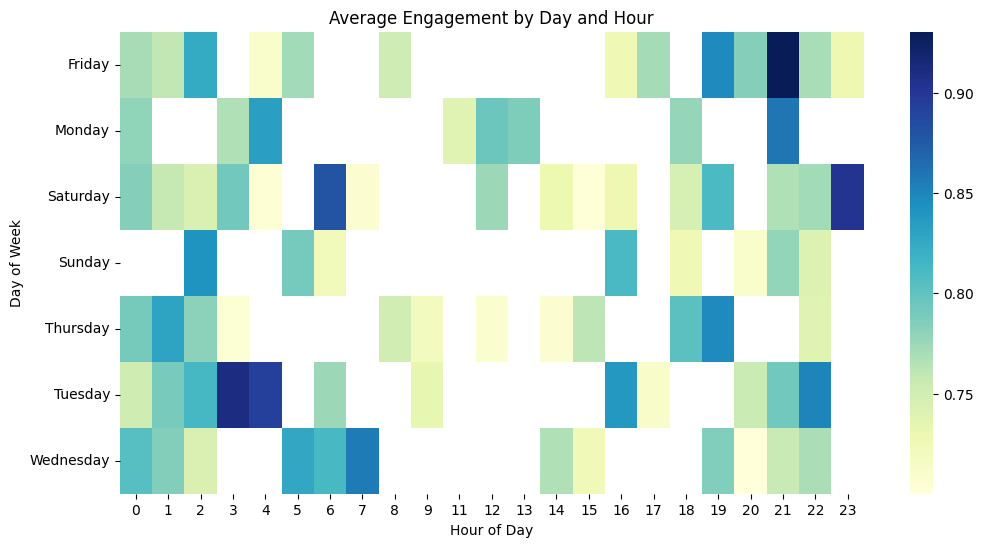

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=False)
plt.title("Average Engagement by Day and Hour")
plt.ylabel("Day of Week")
plt.xlabel("Hour of Day")
plt.show()


### Find Best Time to Publish ('Skin')
Identify the best day and hour to publish for the 'skin' topic based on the highest average engagement score.

In [273]:
best_slot = day_hour_analysis.loc[day_hour_analysis['video_engagement_score'].idxmax()]
print("Best time to publish:", best_slot['day_of_week'], "at", best_slot['hour'], 
      "with avg engagement:", best_slot['video_engagement_score'])


Best time to publish: Friday at 21 with avg engagement: 0.9304854784318076


### Extract and Group Time Features for 'Hair' Topic
Convert the publish time to datetime, extract the day of the week and hour, and group by these features to analyze engagement patterns for the 'hair' topic. This helps identify when hair-related videos perform best in terms of engagement.

In [274]:
# Convert publish time to datetime
hair['publishedAt'] = pd.to_datetime(hair['publishedAt'])
# Day of week (Monday=0, Sunday=6)
hair['day_of_week'] = hair['publishedAt'].dt.day_name()

# Hour of day (0-23)
hair['hour'] = hair['publishedAt'].dt.hour
day_analysis_hair = hair.groupby('day_of_week')['video_engagement_score'].mean().sort_values(ascending=False)

# Engagement by hour
hour_analysis_hair = hair.groupby('hour')['video_engagement_score'].mean()


day_hour_analysis_hair = hair.groupby(['day_of_week', 'hour'])['video_engagement_score'].mean().reset_index()

pivot_table = day_hour_analysis_hair.pivot(index='day_of_week', columns='hour', values='video_engagement_score')


C:\Users\user\AppData\Local\Temp\ipykernel_7724\3029470149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hair['publishedAt'] = pd.to_datetime(hair['publishedAt'])
C:\Users\user\AppData\Local\Temp\ipykernel_7724\3029470149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hair['day_of_week'] = hair['publishedAt'].dt.day_name()
C:\Users\user\AppData\Local\Temp\ipykernel_7724\3029470149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

### Find Best Time to Publish ('Hair')
Identify the best day and hour to publish for the 'hair' topic based on the highest average engagement score. This helps optimize publishing schedules for maximum engagement.

In [275]:
best_slot = day_hour_analysis_hair.loc[day_hour_analysis_hair['video_engagement_score'].idxmax()]
print("Best time to publish:", best_slot['day_of_week'], "at", best_slot['hour'], 
      "with avg engagement:", best_slot['video_engagement_score'])


Best time to publish: Thursday at 1 with avg engagement: 0.9287833604719145


### Extract and Group Time Features for 'Body' Topic
Convert the publish time to datetime, extract the day of the week and hour, and group by these features to analyze engagement patterns for the 'body' topic. This analysis helps determine optimal publishing times for body-related content.

In [276]:
# Convert publish time to datetime
body['publishedAt'] = pd.to_datetime(body['publishedAt'])
# Day of week (Monday=0, Sunday=6)
body['day_of_week'] = body['publishedAt'].dt.day_name()

# Hour of day (0-23)
body['hour'] = body['publishedAt'].dt.hour
day_analysis_body = body.groupby('day_of_week')['video_engagement_score'].mean().sort_values(ascending=False)

# Engagement by hour
hour_analysis_body = body.groupby('hour')['video_engagement_score'].mean()


day_hour_analysis_body = body.groupby(['day_of_week', 'hour'])['video_engagement_score'].mean().reset_index()

pivot_table = day_hour_analysis_body.pivot(index='day_of_week', columns='hour', values='video_engagement_score')

C:\Users\user\AppData\Local\Temp\ipykernel_7724\3502583440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body['publishedAt'] = pd.to_datetime(body['publishedAt'])
C:\Users\user\AppData\Local\Temp\ipykernel_7724\3502583440.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body['day_of_week'] = body['publishedAt'].dt.day_name()
C:\Users\user\AppData\Local\Temp\ipykernel_7724\3502583440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

### Find Best Time to Publish ('Body')
Identify the best day and hour to publish for the 'body' topic based on the highest average engagement score. This insight guides optimal scheduling for body-related videos.

In [277]:
best_slot = day_hour_analysis_body.loc[day_hour_analysis_body['video_engagement_score'].idxmax()]
print("Best time to publish:", best_slot['day_of_week'], "at", best_slot['hour'], 
      "with avg engagement:", best_slot['video_engagement_score'])


Best time to publish: Saturday at 5 with avg engagement: 0.9810419417559928


### Visualize Engagement by Day and Hour ('Body')
Create a heatmap to visualize average engagement by day of the week and hour of publication for the 'body' topic. This visualization helps identify temporal patterns in audience engagement.

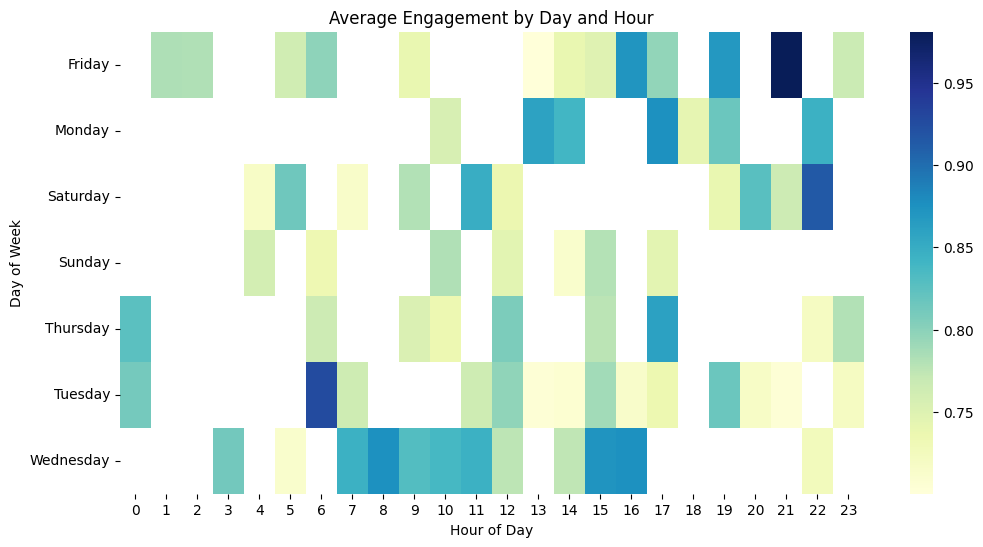

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=False)
plt.title("Average Engagement by Day and Hour")
plt.ylabel("Day of Week")
plt.xlabel("Hour of Day")
plt.show()


### Extract and Group Time Features for 'Perfume' Topic
Convert the publish time to datetime, extract the day of the week and hour, and group by these features to analyze engagement patterns for the 'perfume' topic. This analysis helps determine the best times to post perfume-related content.

In [278]:
# Convert publish time to datetime
perfume['publishedAt'] = pd.to_datetime(perfume['publishedAt'])
# Day of week (Monday=0, Sunday=6)
perfume['day_of_week'] = perfume['publishedAt'].dt.day_name()

# Hour of day (0-23)
perfume['hour'] = perfume['publishedAt'].dt.hour
day_analysis_perfume = perfume.groupby('day_of_week')['video_engagement_score'].mean().sort_values(ascending=False)

# Engagement by hour
hour_analysis_perfume = perfume.groupby('hour')['video_engagement_score'].mean()


day_hour_analysis_perfume = perfume.groupby(['day_of_week', 'hour'])['video_engagement_score'].mean().reset_index()

pivot_table = day_hour_analysis_perfume.pivot(index='day_of_week', columns='hour', values='video_engagement_score')

C:\Users\user\AppData\Local\Temp\ipykernel_7724\2518489474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perfume['publishedAt'] = pd.to_datetime(perfume['publishedAt'])
C:\Users\user\AppData\Local\Temp\ipykernel_7724\2518489474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perfume['day_of_week'] = perfume['publishedAt'].dt.day_name()
C:\Users\user\AppData\Local\Temp\ipykernel_7724\2518489474.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

### Find Best Time to Publish ('Perfume')
Identify the best day and hour to publish for the 'perfume' topic based on the highest average engagement score. This helps optimize the timing of perfume-related video releases.

In [279]:
best_slot = day_hour_analysis_perfume.loc[day_hour_analysis_perfume['video_engagement_score'].idxmax()]
print("Best time to publish:", best_slot['day_of_week'], "at", best_slot['hour'], 
      "with avg engagement:", best_slot['video_engagement_score'])


Best time to publish: Thursday at 11 with avg engagement: 0.9298352853653074


### Extract and Group Time Features for 'Makeup' Topic
Convert the publish time to datetime, extract the day of the week and hour, and group by these features to analyze engagement patterns for the 'makeup' topic. This analysis helps determine the best times to post makeup-related content.

In [280]:
# Convert publish time to datetime
makeup['publishedAt'] = pd.to_datetime(makeup['publishedAt'])
# Day of week (Monday=0, Sunday=6)
makeup['day_of_week'] = makeup['publishedAt'].dt.day_name()

# Hour of day (0-23)
makeup['hour'] = makeup['publishedAt'].dt.hour
day_analysis_makeup = makeup.groupby('day_of_week')['video_engagement_score'].mean().sort_values(ascending=False)

# Engagement by hour
hour_analysis_makeup = makeup.groupby('hour')['video_engagement_score'].mean()


day_hour_analysis_makeup = makeup.groupby(['day_of_week', 'hour'])['video_engagement_score'].mean().reset_index()

pivot_table = day_hour_analysis_makeup.pivot(index='day_of_week', columns='hour', values='video_engagement_score')

C:\Users\user\AppData\Local\Temp\ipykernel_7724\1979338188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  makeup['publishedAt'] = pd.to_datetime(makeup['publishedAt'])
C:\Users\user\AppData\Local\Temp\ipykernel_7724\1979338188.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  makeup['day_of_week'] = makeup['publishedAt'].dt.day_name()
C:\Users\user\AppData\Local\Temp\ipykernel_7724\1979338188.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

### Find Best Time to Publish ('Makeup')
Identify the best day and hour to publish for the 'makeup' topic based on the highest average engagement score. This helps optimize the timing of makeup-related video releases.

In [281]:
best_slot = day_hour_analysis_makeup.loc[day_hour_analysis_makeup['video_engagement_score'].idxmax()]
print("Best time to publish:", best_slot['day_of_week'], "at", best_slot['hour'], 
      "with avg engagement:", best_slot['video_engagement_score'])


Best time to publish: Wednesday at 6 with avg engagement: 0.8863754989604756


### Summarize Best Publishing Times by Topic
Display the best day and hour to publish for each topic category based on the highest average engagement score. This summary provides actionable recommendations for scheduling content releases across all topics.

In [282]:
# Display the best time and day to publish for each topic category
topic_slots = {
    'skin': day_hour_analysis,
    'hair': day_hour_analysis_hair,
    'body': day_hour_analysis_body,
    'perfume': day_hour_analysis_perfume,
    'makeup': day_hour_analysis_makeup
}
for topic, df in topic_slots.items():
    best_slot = df.loc[df['video_engagement_score'].idxmax()]
    print(f"{topic.capitalize()} - Best time to publish: {best_slot['day_of_week']} at {best_slot['hour']} (Avg Engagement: {best_slot['video_engagement_score']:.2f})")

Skin - Best time to publish: Friday at 21 (Avg Engagement: 0.93)
Hair - Best time to publish: Thursday at 1 (Avg Engagement: 0.93)
Body - Best time to publish: Saturday at 5 (Avg Engagement: 0.98)
Perfume - Best time to publish: Thursday at 11 (Avg Engagement: 0.93)
Makeup - Best time to publish: Wednesday at 6 (Avg Engagement: 0.89)


## Analyze Title Length and Engagement
This section explores how the length of video titles (in words) affects engagement scores for each topic. The analysis includes calculating title length, binning titles into groups, and examining correlations and trends.

### Calculate Title Length and Correlation ('Skin')
Calculate the number of words in each video title for the 'skin' topic and analyze the correlation between title length and engagement score. This helps determine if longer or shorter titles are associated with higher engagement.

In [283]:
# Title length in words
skin['title_length_words'] = skin['title'].str.split().str.len()
# Correlation
print(skin[['title_length_words', 'video_engagement_score']].corr())



                        title_length_words  video_engagement_score
title_length_words                1.000000               -0.068629
video_engagement_score           -0.068629                1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_7724\3432111818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skin['title_length_words'] = skin['title'].str.split().str.len()


### Bin Title Lengths and Analyze Engagement ('Skin')
Group video titles for the 'skin' topic into bins based on word count and calculate the average engagement score for each bin. This reveals which title lengths are most effective for engagement.

In [284]:
bins = [0, 3, 6, 10, 15, 20, float('inf')]
labels = ['1-3 words', '4-6 words', '7-10 words', '11-15 words', '16-20 words', '20+ words']

skin['title_length_group'] = pd.cut(skin['title_length_words'], bins=bins, labels=labels)

title_word_analysis_skin = skin.groupby('title_length_group')['video_engagement_score'].mean()
print(title_word_analysis_skin)

title_length_group
1-3 words      0.794427
4-6 words      0.790404
7-10 words     0.775986
11-15 words    0.779717
16-20 words    0.757088
20+ words           NaN
Name: video_engagement_score, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_7724\2157693265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skin['title_length_group'] = pd.cut(skin['title_length_words'], bins=bins, labels=labels)
C:\Users\user\AppData\Local\Temp\ipykernel_7724\2157693265.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  title_word_analysis_skin = skin.groupby('title_length_group')['video_engagement_score'].mean()


### Preview Title Lengths and Engagement ('Skin')
Display the titles, their word counts, and engagement scores for the 'skin' topic to visually inspect the relationship between title length and engagement.

In [285]:
skin[['title', 'title_length_words', 'video_engagement_score']]

,title,title_length_words,video_engagement_score
22600,THIS MADE ME FEEL BLUE 🥲,6,0.950144
7218,Can you keep a secret? 🤫,6,0.930939
7824,I know it’s late but.. Happy International Wom...,12,0.930485
18041,me and my fat behavior 💁‍♀️ #fat #doublechinco...,10,0.915058
14798,Meet the booties 😍😍😍 #beauty #shorts #ytshorts...,11,0.912307
...,...,...,...
5984,Which side do you prefer? Left = unbrushed. Ri...,16,0.703922
12756,How To Look Attractive Without Showing Your Sk...,17,0.702119
14624,pretending i&#39;m in a vogue beauty secrets v...,8,0.701774
14041,Men’s face lightening treatment &amp; carbon h...,13,0.700059


### Calculate Title Length and Analyze Engagement ('Body')
Repeat the title length calculation, binning, and engagement analysis for the 'body' topic. This helps identify optimal title lengths for body-related videos.

In [286]:
# Title length in words
body['title_length_words'] = body['title'].str.split().str.len()

bins = [0, 3, 6, 10, 15, 20, float('inf')]
labels = ['1-3 words', '4-6 words', '7-10 words', '11-15 words', '16-20 words', '20+ words']

body['title_length_group'] = pd.cut(body['title_length_words'], bins=bins, labels=labels)

title_word_analysis_body = body.groupby('title_length_group')['video_engagement_score'].mean()
print(title_word_analysis_body)

title_length_group
1-3 words      0.790811
4-6 words      0.796206
7-10 words     0.789611
11-15 words    0.776990
16-20 words    0.805369
20+ words           NaN
Name: video_engagement_score, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_7724\287668839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body['title_length_words'] = body['title'].str.split().str.len()
C:\Users\user\AppData\Local\Temp\ipykernel_7724\287668839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body['title_length_group'] = pd.cut(body['title_length_words'], bins=bins, labels=labels)
C:\Users\user\AppData\Local\Temp\ipykernel_7724\287668839.py:9: FutureWarning: The default of observed=False is deprecated and will be ch

### Calculate Title Length and Analyze Engagement ('Hair')
Repeat the title length calculation, binning, and engagement analysis for the 'hair' topic. This helps identify optimal title lengths for hair-related videos.

In [287]:
# Title length in words
hair['title_length_words'] = hair['title'].str.split().str.len()

bins = [0, 3, 6, 10, 15, 20, float('inf')]
labels = ['1-3 words', '4-6 words', '7-10 words', '11-15 words', '16-20 words', '20+ words']

hair['title_length_group'] = pd.cut(hair['title_length_words'], bins=bins, labels=labels)

title_word_analysis_hair = hair.groupby('title_length_group')['video_engagement_score'].mean()
print(title_word_analysis_hair)

title_length_group
1-3 words      0.791148
4-6 words      0.791541
7-10 words     0.777069
11-15 words    0.777492
16-20 words    0.802656
20+ words           NaN
Name: video_engagement_score, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_7724\3965307605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hair['title_length_words'] = hair['title'].str.split().str.len()
C:\Users\user\AppData\Local\Temp\ipykernel_7724\3965307605.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hair['title_length_group'] = pd.cut(hair['title_length_words'], bins=bins, labels=labels)
C:\Users\user\AppData\Local\Temp\ipykernel_7724\3965307605.py:9: FutureWarning: The default of observed=False is deprecated and will be

### Preview Title Lengths and Engagement ('Hair')
Display the titles, their word counts, and engagement scores for the 'hair' topic to visually inspect the relationship between title length and engagement.

In [292]:
hair[['title', 'title_length_words', 'video_engagement_score']]

,title,title_length_words,video_engagement_score
309,Which is your favortie? #hairstyle #shortvideo...,8,0.971054
13940,Pakistan cute girls makeup video| very good ma...,15,0.960018
12657,Moments like THIS are my WHY! 😭💗 #alopecia #al...,12,0.944222
8366,Hair is fresh again 💚,5,0.939299
1427,POV: you grew up with curly hair. I relate to ...,19,0.933236
...,...,...,...
22059,I love the confident smile! 🥰 short or long ha...,15,0.701221
798,Styling denim skirt for winter ❄️🧣 #shorts #gr...,9,0.700834
4125,I’m just not that kinda girl 👼 #haircare #hair...,12,0.700706
261,Hairstyle ✨️ ✨️ #youtubeshorts #bridelmakup #h...,12,0.700333


### Calculate Title Length and Analyze Engagement ('Perfume')
Repeat the title length calculation, binning, and engagement analysis for the 'perfume' topic. This helps identify optimal title lengths for perfume-related videos.

In [288]:
# Title length in words
perfume['title_length_words'] = perfume['title'].str.split().str.len()

bins = [0, 3, 6, 10, 15, 20, float('inf')]
labels = ['1-3 words', '4-6 words', '7-10 words', '11-15 words', '16-20 words', '20+ words']

perfume['title_length_group'] = pd.cut(perfume['title_length_words'], bins=bins, labels=labels)

title_word_analysis_perfume = perfume.groupby('title_length_group')['video_engagement_score'].mean()
print(title_word_analysis_perfume)

title_length_group
1-3 words      0.815490
4-6 words      0.781686
7-10 words     0.783777
11-15 words    0.785399
16-20 words    0.769675
20+ words           NaN
Name: video_engagement_score, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_7724\263899497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perfume['title_length_words'] = perfume['title'].str.split().str.len()
C:\Users\user\AppData\Local\Temp\ipykernel_7724\263899497.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perfume['title_length_group'] = pd.cut(perfume['title_length_words'], bins=bins, labels=labels)
C:\Users\user\AppData\Local\Temp\ipykernel_7724\263899497.py:9: FutureWarning: The default of observed=False is deprecated an

### Calculate Title Length and Analyze Engagement ('Makeup')
Repeat the title length calculation, binning, and engagement analysis for the 'makeup' topic. This helps identify optimal title lengths for makeup-related videos.

In [289]:
# Title length in words
makeup['title_length_words'] = makeup['title'].str.split().str.len()

bins = [0, 3, 6, 10, 15, 20, float('inf')]
labels = ['1-3 words', '4-6 words', '7-10 words', '11-15 words', '16-20 words', '20+ words']

makeup['title_length_group'] = pd.cut(makeup['title_length_words'], bins=bins, labels=labels)

title_word_analysis_makeup = makeup.groupby('title_length_group')['video_engagement_score'].mean()
print(title_word_analysis_makeup)

title_length_group
1-3 words      0.794870
4-6 words      0.784093
7-10 words     0.783983
11-15 words    0.774429
16-20 words    0.761565
20+ words      0.725697
Name: video_engagement_score, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_7724\2080192822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  makeup['title_length_words'] = makeup['title'].str.split().str.len()
C:\Users\user\AppData\Local\Temp\ipykernel_7724\2080192822.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  makeup['title_length_group'] = pd.cut(makeup['title_length_words'], bins=bins, labels=labels)
C:\Users\user\AppData\Local\Temp\ipykernel_7724\2080192822.py:9: FutureWarning: The default of observed=False is deprecated and

### Summarize Best Title Length Group by Topic
For each topic, print the title length group with the highest average engagement score. This summary helps identify the most effective title lengths for maximizing engagement in each content category.

In [291]:
# Display the best title length group for each topic based on average KPI
title_length_analyses = {
    'skin': title_word_analysis_skin,
    'body': title_word_analysis_body,
    'hair': title_word_analysis_hair,
    'perfume': title_word_analysis_perfume,
    'makeup': title_word_analysis_makeup
}
for topic, series in title_length_analyses.items():
    best_group = series.idxmax()
    best_kpi = series.max()
    print(f"{topic.capitalize()} - Best title length group: {best_group} (Avg engagement: {best_kpi:.2f})")

Skin - Best title length group: 1-3 words (Avg engagement: 0.79)
Body - Best title length group: 16-20 words (Avg engagement: 0.81)
Hair - Best title length group: 16-20 words (Avg engagement: 0.80)
Perfume - Best title length group: 1-3 words (Avg engagement: 0.82)
Makeup - Best title length group: 1-3 words (Avg engagement: 0.79)


### Extract Hashtags from Titles ('Skin')
Extract hashtags from the titles of 'skin' topic videos and store them as lists. This step prepares the data for analyzing hashtag frequency and its relationship to engagement.

In [ ]:
# Extract hashtags into lists
skin['hashtags'] = skin['title'].apply(lambda x: re.findall(r"#\w+", str(x)))


C:\Users\user\AppData\Local\Temp\ipykernel_7724\995115930.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  skin['hashtags'] = skin['title'].apply(lambda x: re.findall(r"#\w+", str(x)))
C:\Users\user\AppData\Local\Temp\ipykernel_7724\995115930.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skin['hashtags'] = skin['title'].apply(lambda x: re.findall(r"#\w+", str(x)))


### Count and Display Most Common Hashtags ('Skin')
Count the frequency of each hashtag in the 'skin' topic and display the top hashtags. This helps identify which hashtags are most popular among high-engagement videos.

In [294]:
# Count frequency of each hashtag
hashtag_counts = hashtags_exploded['hashtags'].value_counts()

# Show top 10 hashtags by count
print(hashtag_counts.head(5))

hashtags
#shorts      15
#skincare    12
#makeup      11
#39           8
#lipstick     7
Name: count, dtype: int64


### Preview Hashtag Extraction ('Skin')
Display the first few rows of the 'skin' DataFrame to verify that hashtags have been correctly extracted and stored as lists.

In [171]:
skin.head()

,videoId,publishedAt,channelId,title,defaultLanguage,defaultAudioLanguage,contentDuration,dominant_topic,topic_confidence,topic_label,...,get ready with me,duration_mins,duration_group,day_of_week,hour,title_length_chars,title_length_words,title_length_group,hashtag_count,hashtags
9658,81389,2024-10-13 21:16:55+00:00,39722,"The final step to healthy-looking, luxurious l...",NaN,NaN,PT23S,0.0,0.274783,skin,...,0,0.383333,<5 min,Sunday,21,84,12,11-15 words,1,[#hairserum]
24278,78548,2025-03-30 18:00:38+00:00,13360,"Lip Sculpt try on wearing Suede, Sepia &amp; R...",NaN,NaN,PT13S,0.0,0.467321,skin,...,0,0.216667,<5 min,Sunday,18,91,13,11-15 words,4,"[#refybeauty, #makeup, #lipliner, #lipsbeauty]"
21101,46941,2025-02-13 18:00:22+00:00,33425,Subtle Things Men Do That Make a Good First Im...,NaN,NaN,PT10M57S,0.0,0.532352,skin,...,0,10.950000,5-15 min,Thursday,18,82,13,11-15 words,0,[]
11910,75837,2023-11-22 13:46:20+00:00,30364,Nude Lips on Brown Skin| Flower Beauty Perfect...,en-IN,en-GB,PT16S,0.0,0.769604,skin,...,0,0.266667,<5 min,Wednesday,13,92,12,11-15 words,3,"[#ashortaday, #lipstick, #browngirl]"
19941,50301,2025-02-12 17:58:56+00:00,33835,The best red lip combo: Wonderskin Charming li...,NaN,NaN,PT20S,0.0,0.825065,skin,...,0,0.333333,<5 min,Wednesday,17,100,17,16-20 words,0,[]


### Extract and Analyze Hashtags ('Body')
Extract hashtags from 'body' topic video titles, count their frequency, and display the most common hashtags. This process is repeated for each topic to compare hashtag usage patterns.

In [295]:
body['hashtags'] = body['title'].apply(lambda x: re.findall(r"#\w+", str(x)))
# Count frequency of each hashtag
hashtag_counts = body['hashtags'].explode().value_counts()

# Show top 5 hashtags by count
print(hashtag_counts.head(5))

hashtags
#shorts           18
#makeup           10
#youtubeshorts     5
#transandproud     4
#beauty            4
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_7724\1569173129.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  body['hashtags'] = body['title'].apply(lambda x: re.findall(r"#\w+", str(x)))
C:\Users\user\AppData\Local\Temp\ipykernel_7724\1569173129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  body['hashtags'] = body['title'].apply(lambda x: re.findall(r"#\w+", str(x)))


### Extract and Analyze Hashtags ('Hair')
Extract hashtags from 'hair' topic video titles, count their frequency, and display the most common hashtags. This analysis helps identify popular hashtags in hair-related content.

In [296]:
hair['hashtags'] = hair['title'].apply(lambda x: re.findall(r"#\w+", str(x)))
# Count frequency of each hashtag
hashtag_counts = hair['hashtags'].explode().value_counts()

# Show top 5 hashtags by count
print(hashtag_counts.head(5))

hashtags
#shorts       82
#hairstyle    63
#hair         55
#haircare     30
#39           19
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_7724\1572457703.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hair['hashtags'] = hair['title'].apply(lambda x: re.findall(r"#\w+", str(x)))
C:\Users\user\AppData\Local\Temp\ipykernel_7724\1572457703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hair['hashtags'] = hair['title'].apply(lambda x: re.findall(r"#\w+", str(x)))


### Extract and Analyze Hashtags ('Perfume')
Extract hashtags from 'perfume' topic video titles, count their frequency, and display the most common hashtags. This analysis helps identify popular hashtags in perfume-related content.

In [297]:
perfume['hashtags'] = perfume['title'].apply(lambda x: re.findall(r"#\w+", str(x)))
# Count frequency of each hashtag
hashtag_counts = perfume['hashtags'].explode().value_counts()

# Show top 5 hashtags by count
print(hashtag_counts.head(5))

hashtags
#makeup        18
#shorts        13
#transition     7
#skincare       6
#grwm           4
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_7724\178263523.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  perfume['hashtags'] = perfume['title'].apply(lambda x: re.findall(r"#\w+", str(x)))
C:\Users\user\AppData\Local\Temp\ipykernel_7724\178263523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perfume['hashtags'] = perfume['title'].apply(lambda x: re.findall(r"#\w+", str(x)))


### Extract and Analyze Hashtags ('Makeup')
Extract hashtags from 'makeup' topic video titles, count their frequency, and display the most common hashtags. This analysis helps identify popular hashtags in makeup-related content.

In [298]:
makeup['hashtags'] = makeup['title'].apply(lambda x: re.findall(r"#\w+", str(x)))
# Count frequency of each hashtag
hashtag_counts = makeup['hashtags'].explode().value_counts()

# Show top 5 hashtags by count
print(hashtag_counts.head(5))

hashtags
#shorts            316
#makeup            152
#youtubeshorts      66
#makeuptutorial     60
#skincare           44
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_7724\1882895975.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  makeup['hashtags'] = makeup['title'].apply(lambda x: re.findall(r"#\w+", str(x)))
C:\Users\user\AppData\Local\Temp\ipykernel_7724\1882895975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  makeup['hashtags'] = makeup['title'].apply(lambda x: re.findall(r"#\w+", str(x)))


### Analyze Hashtag Count Distribution by Topic
Calculate the mode (most common value) of hashtag counts for each topic. This analysis reveals typical hashtag usage patterns and helps identify if more hashtags are associated with higher engagement.

In [299]:
# Calculate the mode of hashtag count for each topic
for topic, df in zip(['skin', 'body', 'hair', 'perfume', 'makeup'], [skin, body, hair, perfume, makeup]):
    df['hashtag_count'] = df['hashtags'].apply(len)
    mode_count = df['hashtag_count'].mode()[0] if not df['hashtag_count'].mode().empty else None
    print(f"{topic.capitalize()} - Mode of hashtag count: {mode_count}")

Skin - Mode of hashtag count: 0
Body - Mode of hashtag count: 0
Hair - Mode of hashtag count: 0
Perfume - Mode of hashtag count: 0
Makeup - Mode of hashtag count: 0


C:\Users\user\AppData\Local\Temp\ipykernel_7724\15564360.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['hashtag_count'] = df['hashtags'].apply(len)
C:\Users\user\AppData\Local\Temp\ipykernel_7724\15564360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hashtag_count'] = df['hashtags'].apply(len)
C:\Users\user\AppData\Local\Temp\ipykernel_7724\15564360.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

## Summarize Best Practices and Export Results
Aggregate the key findings for each topic, including top keywords, best duration group, optimal publishing time, best title length, and top hashtags. Save the summary to a CSV file for easy reference and further analysis.

In [ ]:
# Aggregate summary for each topic and save to CSV

summary_rows = []
topics = ['skin', 'body', 'hair', 'perfume', 'makeup']
engagement_dfs = [engagement_skin, engagement_body, engagement_hair, engagement_perfume, engagement_makeup]
duration_dfs = [duration_analysis, duration_body, duration_hair, duration_perfume, duration_makeup]
day_hour_dfs = [day_hour_analysis, day_hour_analysis_body, day_hour_analysis_hair, day_hour_analysis_perfume, day_hour_analysis_makeup]
title_length_analyses = [title_word_analysis_skin, title_word_analysis_body, title_word_analysis_hair, title_word_analysis_perfume, title_word_analysis_makeup]
dfs = [skin, body, hair, perfume, makeup]
for i, topic in enumerate(topics):
    # Keywords with lift > 1
    keywords = engagement_dfs[i][engagement_dfs[i]['lift'] > 1].index.tolist()
    # Best duration group
    best_duration = duration_dfs[i].loc[duration_dfs[i]['video_engagement_score'].idxmax()]['duration_group']
    # Best day and time
    best_slot = day_hour_dfs[i].loc[day_hour_dfs[i]['video_engagement_score'].idxmax()]
    best_day = best_slot['day_of_week']
    best_time = best_slot['hour']
    # Best title length group
    best_title_length = title_length_analyses[i].idxmax()
    # Top 5 hashtags
    top_hashtags = dfs[i]['hashtags'].explode().value_counts().head(5).index.tolist()
    summary_rows.append({
        'topic': topic,
        'keywords': keywords,
        'best_duration_group': best_duration,
        'best_day': best_day,
        'best_time': best_time,
        'best_title_length': best_title_length,
        'top_5_hashtags': top_hashtags
    })
summary_df = pd.DataFrame(summary_rows)
summary_df.to_csv('best_video_topic_summary.csv', index=False)
print('Saved summary to best_video_topic_summary.csv')

Saved summary to best_video_topic_summary.csv


### Preview Summary DataFrame
Display the summary DataFrame containing the best practices and recommendations for each topic. This table provides a concise overview of the optimal strategies identified in the analysis.

In [302]:
summary_df

,topic,keywords,best_duration_group,best_day,best_time,best_title_length,top_5_hashtags
0,skin,"[trick, results, challenge, tips, top, haul, r...",15-30 min,Friday,21,1-3 words,"[#shorts, #39, #makeup, #skincare, #beauty]"
1,body,"[ultimate, routine]",<5 min,Saturday,5,16-20 words,"[#shorts, #makeup, #youtubeshorts, #transandpr..."
2,hair,"[challenge, journey, results, get ready with m...",<5 min,Thursday,1,16-20 words,"[#shorts, #hairstyle, #hair, #haircare, #39]"
3,perfume,"[hack, secret, tips, transformation, demo]",<5 min,Thursday,11,1-3 words,"[#makeup, #shorts, #transition, #skincare, #grwm]"
4,makeup,"[morning routine, must try, compilation, vlog,...",<5 min,Wednesday,6,1-3 words,"[#shorts, #makeup, #youtubeshorts, #makeuptuto..."


### Identify Top Performing Channels by Engagement Score
This code reads the video engagement score data, calculates the average engagement score for each channel, sorts the channels to find the best performers, and displays the top 11 channels with the highest average engagement. This helps identify which channels consistently achieve the best audience engagement.

In [ ]:
# Replace with your file path
file_path = "video_with_engagement_score"

# Read CSV into a pandas DataFrame
df = pd.read_csv("video_with_engagement_score.csv")

avg_kpi_by_channel = df.groupby('channelId')['video_engagement_score'].mean()

    # 3. Sort the results in descending order to find the best performers
top_performing_channels = avg_kpi_by_channel.sort_values(ascending=False)

    # 4. Select the top 8 channels
top_11_channels = top_performing_channels.head(11)

    # 5. Print the final result
print("Top 11 Performing Channels (by average video engagement score):")
print("--------------------------------------------------")
print(top_11_channels)
